In [1]:
import numpy as np
from pso import *
from soga import *
from lshade import *
from data import *
from evaluate import *
from util import *
import matplotlib.pyplot as plt
import tqdm
import pickle

# Dataset

In [2]:
with open('./saved/continuous/continuous-dataset.pkl', 'rb') as f:
    continuous_dataset = pickle.load(f)

In [3]:
DATA_TYPES = ['inc-target', 'inc-sensor', 'inc-sensing']
DATA_SIZES = ['small']
METRICS = ['di', 'qbi', 'as', 'cq', 'var']

In [17]:
(continuous_dataset['inc-sensor'][0]['small'][6].targets == continuous_dataset['inc-sensor'][0]['small'][7].targets)

True

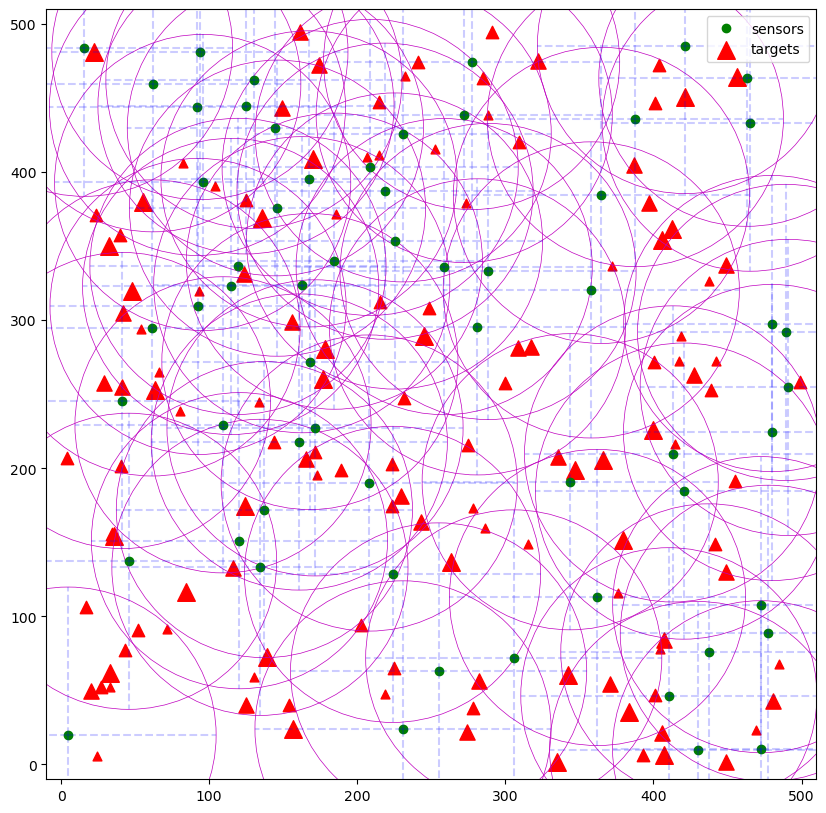

In [15]:
network = continuous_dataset['inc-sensor'][0]['small'][2]
show_network(data=network, figsize=(10, 10))

# Solve

## LSHADE

In [35]:
lshade_res = {'inc-target': [], 'inc-sensor': [], 'inc-sensing': []}

In [37]:
for data_type in DATA_TYPES:
    data_type_res = []
    for i in tqdm.tqdm(range(len(continuous_dataset[data_type]))):
        dataset_res = {}
        for data_size in continuous_dataset[data_type][i]:
            dataset_size_res = []
            for j in range(len(continuous_dataset[data_type][i][data_size])):
                dt = continuous_dataset[data_type][i][data_size][j]
                lshade = LSHADE()
                lshade.adapt(dt)
                bound_values = np.repeat([[-0.5, 4.5]], dt.n, axis=0)
                config = LSHADEConfig(
                    population_size=dt.n*20,
                    memory_size=15,
                    max_evals=2000*dt.n,
                    bounds=bound_values,
                    seed=29,
                    useless_penalty=3,
                    activated_penalty=0.001)
                best, best_val, hist = lshade.solve(config)
                sensors_mask = np.round(best).astype(int)
                res = SolveResult(sensors_mask=sensors_mask)

                dataset_size_res.append(res)
            dataset_res[data_size] = dataset_size_res
        data_type_res.append(dataset_res)
    lshade_res[data_type] = data_type_res

  0%|          | 0/1 [00:00<?, ?it/s]e:\OneDrive - Hanoi University of Science and Technology\Chuyen nganh\Evolutionary Computation\BTL Lab\lshade.py:171: RuntimeWarning: invalid value encountered in scalar divide
  m_cr[k] = np.sum(weights*cr[indexes]**2) / np.sum(weights*cr[indexes])
100%|██████████| 1/1 [29:04<00:00, 1744.05s/it]


In [40]:
with open('./saved/continuous/lshade_res.pkl', 'rb') as f:
    lshade_res = pickle.load(f)

# with open('./saved/continuous/lshade_res.pkl', 'wb') as f:
#     pickle.dump(lshade_res, f)

In [41]:
lshade_res

{'inc-target': [{'small': [<data.SolveResult at 0x23afd39fa90>,
    <data.SolveResult at 0x23a80c95d10>]}],
 'inc-sensor': [{'small': [<data.SolveResult at 0x23a80c95ed0>,
    <data.SolveResult at 0x23a8018b7d0>]}],
 'inc-sensing': [{'small': [<data.SolveResult at 0x23a8018a850>,
    <data.SolveResult at 0x23a801bf2d0>]}]}

## SOGA

### linear mode

In [16]:
soga_linear_res = {'inc-target': [], 'inc-sensor': [], 'inc-sensing': []}
soga = SOGA()

In [17]:
for data_type in DATA_TYPES:
    data_type_res = []
    for i in tqdm.tqdm(range(len(continuous_dataset[data_type]))):
        dataset_res = {}
        for data_size in continuous_dataset[data_type][i]:
            dataset_size_res = []
            for j in range(len(continuous_dataset[data_type][i][data_size])):
                dt = continuous_dataset[data_type][i][data_size][j]
                soga.adapt(data=dt)
                sensors_mask, _ = soga.solve(mode='linear')
                res = SolveResult(sensors_mask=sensors_mask)
                
                dataset_size_res.append(res)
            dataset_res[data_size] = dataset_size_res
        data_type_res.append(dataset_res)
    soga_linear_res[data_type] = data_type_res

100%|██████████| 1/1 [00:02<00:00,  2.97s/it]


In [19]:
with open('./saved/continuous/soga_linear_res.pkl', 'rb') as f:
    soga_linear_res = pickle.load(f)

# with open('./saved/continuous/soga_linear_res.pkl', 'wb') as f:
#     pickle.dump(soga_linear_res, f)

### quadratic mode

In [22]:
soga_quadratic_res = {'inc-target': [], 'inc-sensor': [], 'inc-sensing': []}
soga = SOGA()

In [23]:
for data_type in DATA_TYPES:
    data_type_res = []
    for i in tqdm.tqdm(range(len(continuous_dataset[data_type]))):
        dataset_res = {}
        for data_size in continuous_dataset[data_type][i]:
            dataset_size_res = []
            for j in range(len(continuous_dataset[data_type][i][data_size])):
                dt = continuous_dataset[data_type][i][data_size][j]
                soga.adapt(data=dt)
                sensors_mask, _ = soga.solve(mode='quadratic')
                res = SolveResult(sensors_mask=sensors_mask)
                
                dataset_size_res.append(res)
            dataset_res[data_size] = dataset_size_res
        data_type_res.append(dataset_res)
    soga_quadratic_res[data_type] = data_type_res

100%|██████████| 1/1 [00:03<00:00,  3.39s/it]


In [24]:
# with open('./saved/continuous/soga_quadratic_res.pkl', 'rb') as f:
#     soga_quadratic_res = pickle.load(f)

with open('./saved/continuous/soga_quadratic_res.pkl', 'wb') as f:
    pickle.dump(soga_quadratic_res, f)

### prioritize mode

In [25]:
soga_prioritize_res = {'inc-target': [], 'inc-sensor': [], 'inc-sensing': []}
soga = SOGA()

In [26]:
for data_type in DATA_TYPES:
    data_type_res = []
    for i in tqdm.tqdm(range(len(continuous_dataset[data_type]))):
        dataset_res = {}
        for data_size in continuous_dataset[data_type][i]:
            dataset_size_res = []
            for j in range(len(continuous_dataset[data_type][i][data_size])):
                dt = continuous_dataset[data_type][i][data_size][j]
                soga.adapt(data=dt)
                sensors_mask, _ = soga.solve(mode='prioritize')
                res = SolveResult(sensors_mask=sensors_mask)
                
                dataset_size_res.append(res)
            dataset_res[data_size] = dataset_size_res
        data_type_res.append(dataset_res)
    soga_prioritize_res[data_type] = data_type_res

100%|██████████| 1/1 [00:03<00:00,  3.77s/it]


In [27]:
with open('./saved/continuous/soga_prioritize_res.pkl', 'rb') as f:
    soga_prioritize_res = pickle.load(f)

# with open('./saved/continuous/soga_prioritize_res.pkl', 'wb') as f:
#     pickle.dump(soga_prioritize_res, f)

### reduced_variance mode

In [28]:
soga_reduced_variance_res = {'inc-target': [], 'inc-sensor': [], 'inc-sensing': []}
soga = SOGA()

In [29]:
for data_type in DATA_TYPES:
    data_type_res = []
    for i in tqdm.tqdm(range(len(continuous_dataset[data_type]))):
        dataset_res = {}
        for data_size in continuous_dataset[data_type][i]:
            dataset_size_res = []
            for j in range(len(continuous_dataset[data_type][i][data_size])):
                dt = continuous_dataset[data_type][i][data_size][j]
                soga.adapt(data=dt)
                sensors_mask, _ = soga.solve(mode='reduced_variance')
                res = SolveResult(sensors_mask=sensors_mask)
                
                dataset_size_res.append(res)
            dataset_res[data_size] = dataset_size_res
        data_type_res.append(dataset_res)
    soga_reduced_variance_res[data_type] = data_type_res

100%|██████████| 1/1 [00:03<00:00,  3.12s/it]


In [31]:
with open('./saved/continuous/soga_reduced_variance_res.pkl', 'rb') as f:
    soga_reduced_variance_res = pickle.load(f)

# with open('./saved/continuous/soga_reduced_variance_res.pkl', 'wb') as f:
#     pickle.dump(soga_reduced_variance_res, f)

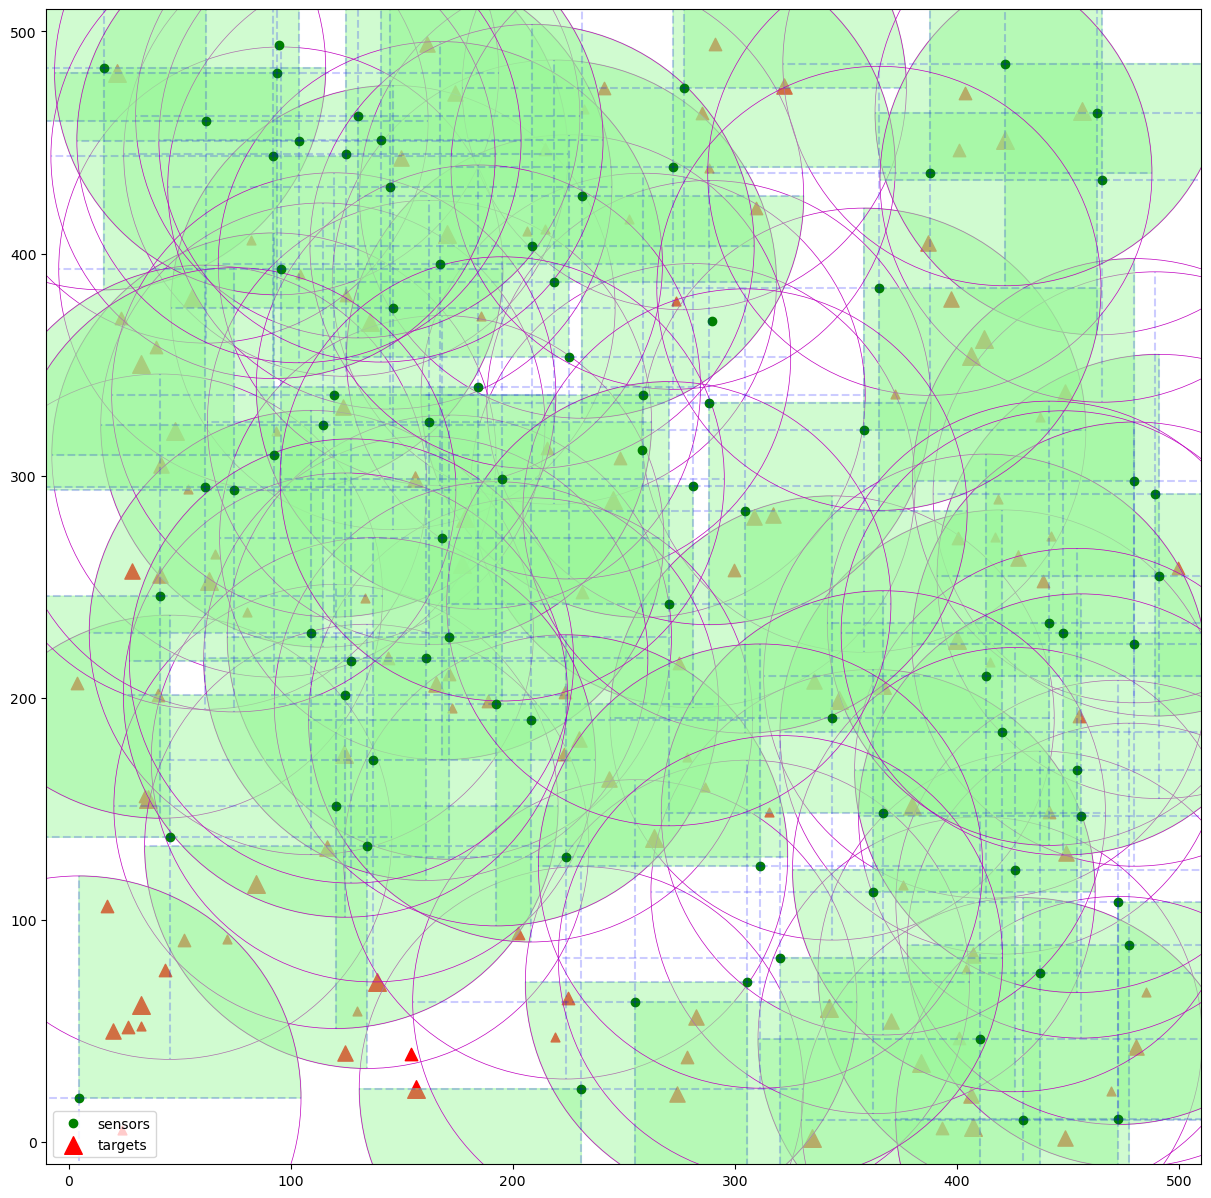

In [49]:
network = continuous_dataset['inc-sensor'][0]['small'][3]
sensors_mask = soga_reduced_variance_res['inc-sensor'][0]['small'][3].sensors_mask

show_network(data=network, sensors_mask=sensors_mask, figsize=(15, 15))

# Metric evaluate

In [4]:
with open('./saved/continuous/lshade_res.pkl', 'rb') as f:
    lshade_res = pickle.load(f)

with open('./saved/continuous/soga_linear_res.pkl', 'rb') as f:
    soga_linear_res = pickle.load(f)
with open('./saved/continuous/soga_quadratic_res.pkl', 'rb') as f:
    soga_quadratic_res = pickle.load(f)
with open('./saved/continuous/soga_prioritize_res.pkl', 'rb') as f:
    soga_prioritize_res = pickle.load(f)
with open('./saved/continuous/soga_reduced_variance_res.pkl', 'rb') as f:
    soga_reduced_variance_res = pickle.load(f)

In [19]:
from copy import deepcopy

metric_res = {'inc-target': {'small': None},
              'inc-sensor': {'small': None},
              'inc-sensing': {'small': None}}
all_metrics_res = {'qbi': deepcopy(metric_res),
                   'di': deepcopy(metric_res),
                   'as': deepcopy(metric_res),
                   'cq': deepcopy(metric_res),
                   'var': deepcopy(metric_res)}


lshade_metric_res = deepcopy(all_metrics_res)
soga_linear_metric_res = deepcopy(all_metrics_res)
soga_quadratic_metric_res = deepcopy(all_metrics_res)
soga_prioritize_metric_res = deepcopy(all_metrics_res)
soga_reduced_variance_metric_res = deepcopy(all_metrics_res)

In [20]:
# lshade_metric_res
for metric in tqdm.tqdm(METRICS): 
    for data_type in DATA_TYPES:
        for data_size in DATA_SIZES:
            lshade_metric_res[metric][data_type][data_size] = generate_metric_evaluation(datasets=continuous_dataset,
                                                                                         res_set=lshade_res,
                                                                                         data_type=data_type,
                                                                                         data_size=data_size,
                                                                                         metric=metric)            

100%|██████████| 5/5 [00:42<00:00,  8.47s/it]


In [21]:
# soga_linear_metric_res
for metric in tqdm.tqdm(METRICS): 
    for data_type in DATA_TYPES:
        for data_size in DATA_SIZES:
            soga_linear_metric_res[metric][data_type][data_size] = generate_metric_evaluation(datasets=continuous_dataset,
                                                                                         res_set=soga_linear_res,
                                                                                         data_type=data_type,
                                                                                         data_size=data_size,
                                                                                         metric=metric)            

100%|██████████| 5/5 [00:40<00:00,  8.11s/it]


In [22]:
# soga_quadratic_metric_res
for metric in tqdm.tqdm(METRICS): 
    for data_type in DATA_TYPES:
        for data_size in DATA_SIZES:
            soga_quadratic_metric_res[metric][data_type][data_size] = generate_metric_evaluation(datasets=continuous_dataset,
                                                                                         res_set=soga_quadratic_res,
                                                                                         data_type=data_type,
                                                                                         data_size=data_size,
                                                                                         metric=metric)            

100%|██████████| 5/5 [00:40<00:00,  8.08s/it]


In [23]:
# soga_prioritize_metric_res
for metric in tqdm.tqdm(METRICS): 
    for data_type in DATA_TYPES:
        for data_size in DATA_SIZES:
            soga_prioritize_metric_res[metric][data_type][data_size] = generate_metric_evaluation(datasets=continuous_dataset,
                                                                                         res_set=soga_prioritize_res,
                                                                                         data_type=data_type,
                                                                                         data_size=data_size,
                                                                                         metric=metric)            

100%|██████████| 5/5 [00:43<00:00,  8.72s/it]


In [24]:
# soga_reduced_variance_metric_res
for metric in tqdm.tqdm(METRICS): 
    for data_type in DATA_TYPES:
        for data_size in DATA_SIZES:
            soga_reduced_variance_metric_res[metric][data_type][data_size] = generate_metric_evaluation(datasets=continuous_dataset,
                                                                                         res_set=soga_reduced_variance_res,
                                                                                         data_type=data_type,
                                                                                         data_size=data_size,
                                                                                         metric=metric)            

100%|██████████| 5/5 [00:41<00:00,  8.26s/it]


# Plot

In [76]:
data_type = 'inc-sensing'
data_size = 'small'
metric = 'as'

In [77]:
if data_type == 'inc-sensor':
    x_axis = [continuous_dataset[data_type][0][data_size][i].n for i in range(len(continuous_dataset[data_type][0][data_size]))]
if data_type == 'inc-target':
    x_axis = [continuous_dataset[data_type][0][data_size][i].m for i in range(len(continuous_dataset[data_type][0][data_size]))]
if data_type == 'inc-sensing':
    x_axis = [continuous_dataset[data_type][0][data_size][i].radius for i in range(len(continuous_dataset[data_type][0][data_size]))]

lshade = lshade_metric_res[metric][data_type][data_size]
soga_ilp = soga_linear_metric_res[metric][data_type][data_size]
soga_iqp = soga_quadratic_metric_res[metric][data_type][data_size]
soga_p_iqp = soga_prioritize_metric_res[metric][data_type][data_size]
soga_rv_iqp = soga_reduced_variance_metric_res[metric][data_type][data_size]

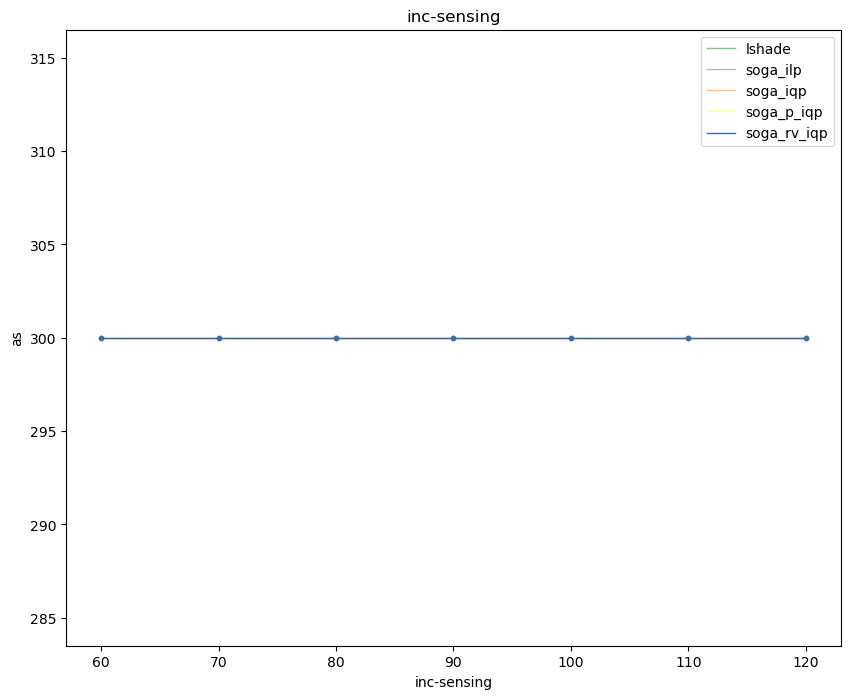

In [78]:
ax = plot_metric_evaluation(x_axis=x_axis,
                            y_axis=[lshade, soga_ilp, soga_iqp, soga_p_iqp, soga_rv_iqp],
                            x_label=data_type,
                            y_label=metric,
                            labels=['lshade', 'soga_ilp', 'soga_iqp', 'soga_p_iqp', 'soga_rv_iqp'],
                            title=data_type)
plt.show()